# Question 1

<Figure size 720x360 with 0 Axes>

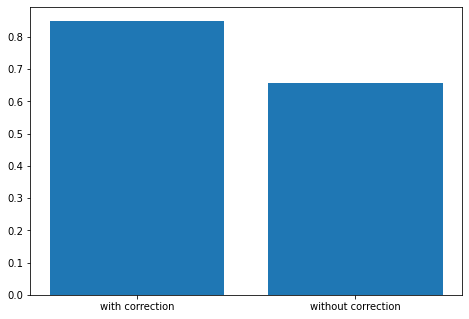

In [1]:
import numpy as np  #importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def fact(n):  #defining functions for factorial
    x = 1
    for i in range(1, n+1):
        x *= i
    return x

def comb(n, k):
    x = 1
    return fact(n)/(fact(k)*fact(n-k))


def binompmf(prob, n, k):  # making final function of factorial 
    return comb(n,k)*prob**k*(1-prob)**(n-k)

x2=binompmf(0.1,7,0)
x3=binompmf(0.1,7,1)
x4=x2+x3 #Adding P(0) and P(1) using binomial function defination

x5=binompmf(0.1,4,0)
fig = plt.figure(figsize = (10, 5))
values=[x4,x5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
probability = ['with correction', 'without correction']
ax.bar(probability,values)
plt.show()




# Question 2

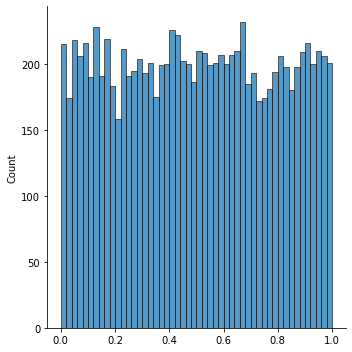

In [2]:
import random
a = np.random.uniform(0, 1, 10000)#defining function using uniform function in random
sns.displot(a,bins=50)#plotting using seaborn
plt.show()



# Question 3

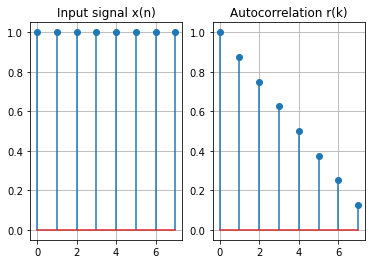

In [3]:
x = np.asarray([0,1,2,3,4,5,6,7])
N=len(x)
r=np.zeros(N)
def autocorrelation(x,N):
    r = [0] * (N)  # Declaring y as a zero array of length N
    for i in range(N):
        for j in range(N):
            if(i-j<0):
                r[j] +=0
            else:   
                r[j] += (x[i]*x[i-j])/N #Autocorrelation function defination

    return r

y1 = autocorrelation(x,N)
n = [i for i in range(8)]
x = [1 for i in range(8)]
r = autocorrelation(x,N)

plt.subplot(1,2,1)
plt.stem(n,x)
plt.title("Input signal x(n)")
plt.grid()

plt.subplot(1,2,2)
plt.stem(n,r)
plt.title("Autocorrelation r(k)")
plt.grid()

# Question 4

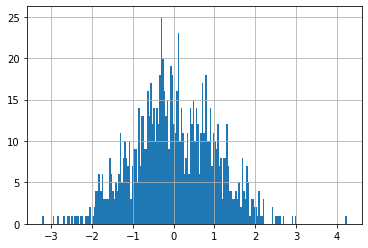

In [4]:
# 4(a)
mean = 0
std = 1 
num_samples = 1000
num_bins=200
samples = np.random.normal(mean, std, size=num_samples) #using normal function 
plt.hist(samples, num_bins) #Histogram plotting of white noise
plt.grid()
plt.show()


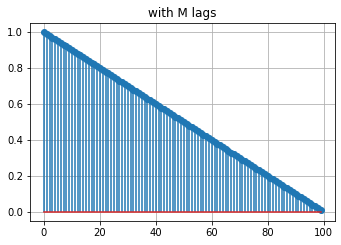

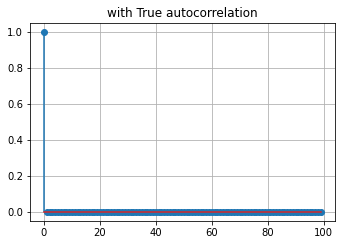

In [5]:
#4(b)
M = 100
x=[1 for i in range(M)] # all values of M
def autocorr(x):  #function defination
    N = len(x)
    r = np.zeros(N)
    for k in range(N):
        for i in range(N):
            if(i-k<0):
                r[k] += 0
            else:
                r[k] += (x[i]*x[i-k])/N
    return r

r= autocorr(x)[0:M] # First M lags of autocorrelation
t_r = [1] + [0 for i in range(M-1)]
n = [i for i in range(M)]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.stem(n,r)
plt.title("with M lags")
plt.grid()
plt.figure(figsize=(12,8))
plt.subplot(2,2,2)
plt.stem(n,t_r)
plt.title("with True autocorrelation")
plt.grid()



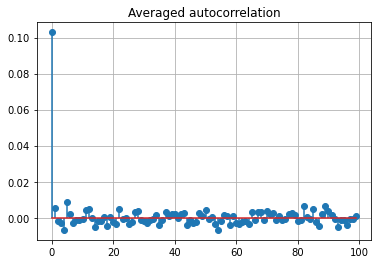

In [9]:
#4(c)
M = 100
def averaged_autocorr(x,M=100):
    N = len(x)
    r = np.zeros(M)
    for k in range(M):
        for m in range(10):
            for n in range(M):
                if(n-k+100*m<0):
                    r[k] += 0
                else:
                    r[k] += (x[n+100*m]*x[n-k+100*m])/N
    return r
    
x = np.random.randn(N) # N samples from standard normal distribution

r1_avg = averaged_autocorr(x)
true_autocorr = [1] + [0 for i in range(M-1)]
n = [i for i in range(M)]

plt.stem(n,r1_avg)
plt.title("Averaged autocorrelation")
plt.grid()

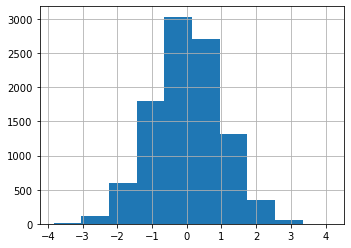

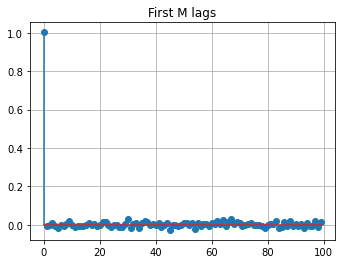

In [8]:
#4(d)
M=100
N = 10000  # when random samples are 10000
x = np.random.randn(N) 

r = autocorr(x)[0:M] # First M lags of autocorrelation
n = [i for i in range(M)]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(x)
plt.grid()

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.stem(n,r)
plt.title("First M lags")
plt.grid()



When we compare the first M lags of autocorrelation between part(b) and part(d), we can say that by increasing the sample size the autocorrelation becomes much closer to the true autocorrelation.

# Question 5

In [10]:
# and creating dataframe
data = pd.read_csv("seeds.csv")

n= data['Area'].tolist() #taking column of area
m=data['Perimeter'].tolist()#taking column of perimeter
p=data['Compactness'].tolist()
q=data['Kernel.Length'].tolist()
r=data['Kernel.Width'].tolist()
s=data['Asymmetry.Coeff'].tolist()
t=data['Kernel.Groove'].tolist()


In [11]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x= sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i - mean_x for i in x]# Subtracting mean from the individual elements
    sub_y = [i - mean_y for i in y]
    num = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    den= len(x)-1
    cov = num/den
    return cov
x1=covariance(n, m)

def correlation(x, y):
    mean_x = sum(x)/float(len(x))# Finding the mean of the series x and y
    mean_y = sum(y)/float(len(y))
    
    sub_x = [i-mean_x for i in x]# Subtracting mean from the individual elements
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    num = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])# Standard Deviation of x and y
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    den= (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = num/den
    return cor
# BY taking features of 1 column and calculate correlation and covariance  with other features
x2=correlation(n, m)
d12=correlation(n,m)
c12=covariance(n,m)
d13=correlation(n,p)
c13=covariance(n,p)
d14=correlation(n,q)
c14=covariance(n,q)
d15=correlation(n,r)
c15=covariance(n,r)
d16=correlation(n,s)
c16=covariance(n,s)
d17=correlation(n,t)
c17=covariance(n,t)
data1={'Correlation with user defined fn':[d12,d13,d14,d15,d16,d17,0],
      'Covariance with user defined fn':[c12,c13,c14,c15,c16,c17,0],
      'Correlation with numpy fn':[np.corrcoef(n,(m,p,q,r,s,t))],
      'Covariance with numpy fn':[np.cov(n,(m,p,q,r,s,t))]}
df1 = pd.DataFrame(data1,index=[f"feat{i}" for i in range(1,8)])
print("using FEAT1")
df1
    


using FEAT1


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994437,3.805181,0.994437,3.805181
feat2,0.609887,0.041530,0.609887,0.041530
feat3,0.951126,1.231976,0.951126,1.231976
feat4,0.970980,1.072631,0.970980,1.072631
feat5,-0.222820,-0.957144,-0.222820,-0.957144
feat6,0.862727,1.241226,0.862727,1.241226
feat7,0.000000,0.000000,0.000000,0.000000


In [12]:
# BY taking features of 2 column and calculate correlation and covariance  with other features
d21=correlation(m,n)
c21=covariance(m,n)
d23=correlation(m,p)
c23=covariance(m,p)
d24=correlation(m,q)
c24=covariance(m,q)
d25=correlation(m,r)
c25=covariance(m,r)
d26=correlation(m,s)
c26=covariance(m,s)
d27=correlation(m,t)
c27=covariance(m,t)

data2={'Correlation with user defined fn':[d21,d23,d24,d25,d26,d27,0],
      'Covariance with user defined fn':[c21,c23,c24,c25,c26,c27,0],
      'Correlation with numpy fn':[np.corrcoef(m,(n,p,q,r,s,t))],
      'Covariance with numpy fn':[np.cov(m,(n,p,q,r,s,t))]}
df2 = pd.DataFrame(data1,index=[f"feat{i}" for i in range(1,8)])
print("using FEAT2")
df2



using FEAT2


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994437,3.805181,0.994437,3.805181
feat2,0.609887,0.041530,0.609887,0.041530
feat3,0.951126,1.231976,0.951126,1.231976
feat4,0.970980,1.072631,0.970980,1.072631
feat5,-0.222820,-0.957144,-0.222820,-0.957144
feat6,0.862727,1.241226,0.862727,1.241226
feat7,0.000000,0.000000,0.000000,0.000000


In [13]:
# BY taking features of 3 column and calculate correlation and covariance  with other features
d32=correlation(p,m)
c32=covariance(p,m)
d31=correlation(p,n)
c31=covariance(p,n)
d34=correlation(p,q)
c34=covariance(p,q)
d35=correlation(p,r)
c35=covariance(p,r)
d36=correlation(p,s)
c36=covariance(p,s)
d37=correlation(p,t)
c37=covariance(p,t)
data3={'Correlation with user defined fn':[d31,d32,d34,d35,d36,d37,0],
      'Covariance with user defined fn':[c31,c32,c34,c35,c36,c37,0],
      'Correlation with numpy fn':[np.corrcoef(p,(n,m,q,r,s,t))],
      'Covariance with numpy fn':[np.cov(p,(n,m,q,r,s,t))]}
df3 = pd.DataFrame(data1,index=[f"feat{i}" for i in range(1,8)])
print("using FEAT3")
df3

using FEAT3


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994437,3.805181,0.994437,3.805181
feat2,0.609887,0.041530,0.609887,0.041530
feat3,0.951126,1.231976,0.951126,1.231976
feat4,0.970980,1.072631,0.970980,1.072631
feat5,-0.222820,-0.957144,-0.222820,-0.957144
feat6,0.862727,1.241226,0.862727,1.241226
feat7,0.000000,0.000000,0.000000,0.000000


In [14]:
# BY taking features of 4 column and calculate correlation and covariance  with other features
d41=correlation(q,n)
c41=covariance(q,n)
d42=correlation(q,m)
c42=covariance(q,m)
d43=correlation(q,p)
c43=covariance(q,p)

d45=correlation(q,r)
c45=covariance(q,r)
d46=correlation(q,s)
c46=covariance(q,s)
d47=correlation(q,t)
c47=covariance(q,t)
data4={'Correlation with user defined fn':[d41,d42,d43,d45,d46,d47,0],
      'Covariance with user defined fn':[c41,c42,c43,c45,c46,c47,0],
      'Correlation with numpy fn':[np.corrcoef(q,(n,m,p,r,s,t))],
      'Covariance with numpy fn':[np.cov(q,(n,m,p,r,s,t))]}
df4 = pd.DataFrame(data1,index=[f"feat{i}" for i in range(1,8)])
print("using FEAT4")
df4


using FEAT4


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994437,3.805181,0.994437,3.805181
feat2,0.609887,0.041530,0.609887,0.041530
feat3,0.951126,1.231976,0.951126,1.231976
feat4,0.970980,1.072631,0.970980,1.072631
feat5,-0.222820,-0.957144,-0.222820,-0.957144
feat6,0.862727,1.241226,0.862727,1.241226
feat7,0.000000,0.000000,0.000000,0.000000


In [15]:
# BY taking features of 5 column and calculate correlation and covariance  with other features
d51=correlation(r,n)
c51=covariance(r,n)
d52=correlation(r,m)
c52=covariance(r,m)
d53=correlation(r,p)
c53=covariance(r,p)

d54=correlation(r,q)
c54=covariance(r,q)
d56=correlation(r,s)
c56=covariance(r,s)
d57=correlation(r,t)
c57=covariance(r,t)

data5={'Correlation with user defined fn':[d51,d52,d53,d54,d56,d57,0],
      'Covariance with user defined fn':[c51,c52,c53,c54,c56,c57,0],
      'Correlation with numpy fn':[np.corrcoef(r,(n,m,p,q,s,t))],
      'Covariance with numpy fn':[np.cov(r,(n,m,p,q,s,t))]}
df5 = pd.DataFrame(data1,index=[f"feat{i}" for i in range(1,8)])
print("using FEAT5")
df5


using FEAT5


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994437,3.805181,0.994437,3.805181
feat2,0.609887,0.041530,0.609887,0.041530
feat3,0.951126,1.231976,0.951126,1.231976
feat4,0.970980,1.072631,0.970980,1.072631
feat5,-0.222820,-0.957144,-0.222820,-0.957144
feat6,0.862727,1.241226,0.862727,1.241226
feat7,0.000000,0.000000,0.000000,0.000000


In [16]:
# BY taking features of 6 column and calculate correlation and covariance  with other features
d61=correlation(s,n)
c61=covariance(s,n)
d62=correlation(s,m)
c62=covariance(s,m)
d63=correlation(s,p)
c63=covariance(s,p)

d64=correlation(s,q)
c64=covariance(s,q)
d65=correlation(s,r)
c65=covariance(s,r)
d67=correlation(s,t)
c67=covariance(s,t)
data6={'Correlation with user defined fn':[d61,d62,d63,d64,d65,d67,0],
      'Covariance with user defined fn':[c61,c62,c63,c64,c65,c67,0],
      'Correlation with numpy fn':[np.corrcoef(s,(n,m,p,q,r,t))],
      'Covariance with numpy fn':[np.cov(s,(n,m,p,q,r,t))]}
df6 = pd.DataFrame(data1,index=[f"feat{i}" for i in range(1,8)])
print("using FEAT6")
df6


using FEAT6


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994437,3.805181,0.994437,3.805181
feat2,0.609887,0.041530,0.609887,0.041530
feat3,0.951126,1.231976,0.951126,1.231976
feat4,0.970980,1.072631,0.970980,1.072631
feat5,-0.222820,-0.957144,-0.222820,-0.957144
feat6,0.862727,1.241226,0.862727,1.241226
feat7,0.000000,0.000000,0.000000,0.000000


In [17]:
# BY taking features of 7 column and calculate correlation and covariance  with other features
d71=correlation(t,n)
c71=covariance(t,n)
d72=correlation(t,m)
c72=covariance(t,m)
d73=correlation(t,p)
c73=covariance(t,p)

d74=correlation(t,q)
c74=covariance(t,q)
d75=correlation(t,r)
c75=covariance(t,r)
d76=correlation(t,s)
c76=covariance(t,s)
data7={'Correlation with user defined fn':[d71,d72,d73,d74,d75,d76,0],
      'Covariance with user defined fn':[c71,c72,c73,c74,c75,c76,0],
      'Correlation with numpy fn':[np.corrcoef(t,(n,m,p,q,r,s))],
      'Covariance with numpy fn':[np.cov(t,(n,m,p,q,s,r))]}
df7 = pd.DataFrame(data1,index=[f"feat{i}" for i in range(1,8)])
print("using FEAT7")
df7

using FEAT7


,Correlation with user defined fn,Covariance with user defined fn,Correlation with numpy fn,Covariance with numpy fn
feat1,0.994437,3.805181,0.994437,3.805181
feat2,0.609887,0.041530,0.609887,0.041530
feat3,0.951126,1.231976,0.951126,1.231976
feat4,0.970980,1.072631,0.970980,1.072631
feat5,-0.222820,-0.957144,-0.222820,-0.957144
feat6,0.862727,1.241226,0.862727,1.241226
feat7,0.000000,0.000000,0.000000,0.000000


# Question 6


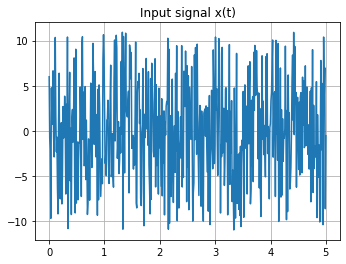

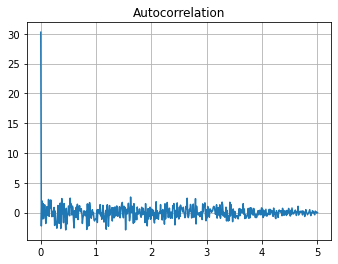

In [18]:
# first define function then apply autocorrelation
def x_t(t,phi1,phi2):
    return 5*np.sin(2*t+phi1) + 6*np.sin(3*t+phi2)

def autocorrelation(x,N):
    r = [0] * (N)  # Declaring y as a zero array of length N
    for i in range(N):
        for j in range(N):
            if(i-j<0):
                r[j] +=0
            else:   
                r[j] += (x[i]*x[i-j])/N #Autocorrelation function defination

    return r

phi1 = np.linspace(-np.pi,np.pi)
phi2 = np.linspace(0,2*np.pi)
t = np.linspace(0,5,500)
x = [x_t(i,random.choice(phi1),random.choice(phi2)) for i in t]
#x = [x_t(i,-np.pi/2,np.pi/2) for i in t]
r = autocorr(x)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t,x)
plt.title("Input signal x(t)")
plt.grid()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(t,r)
plt.title("Autocorrelation")
plt.grid()

# 6(b)

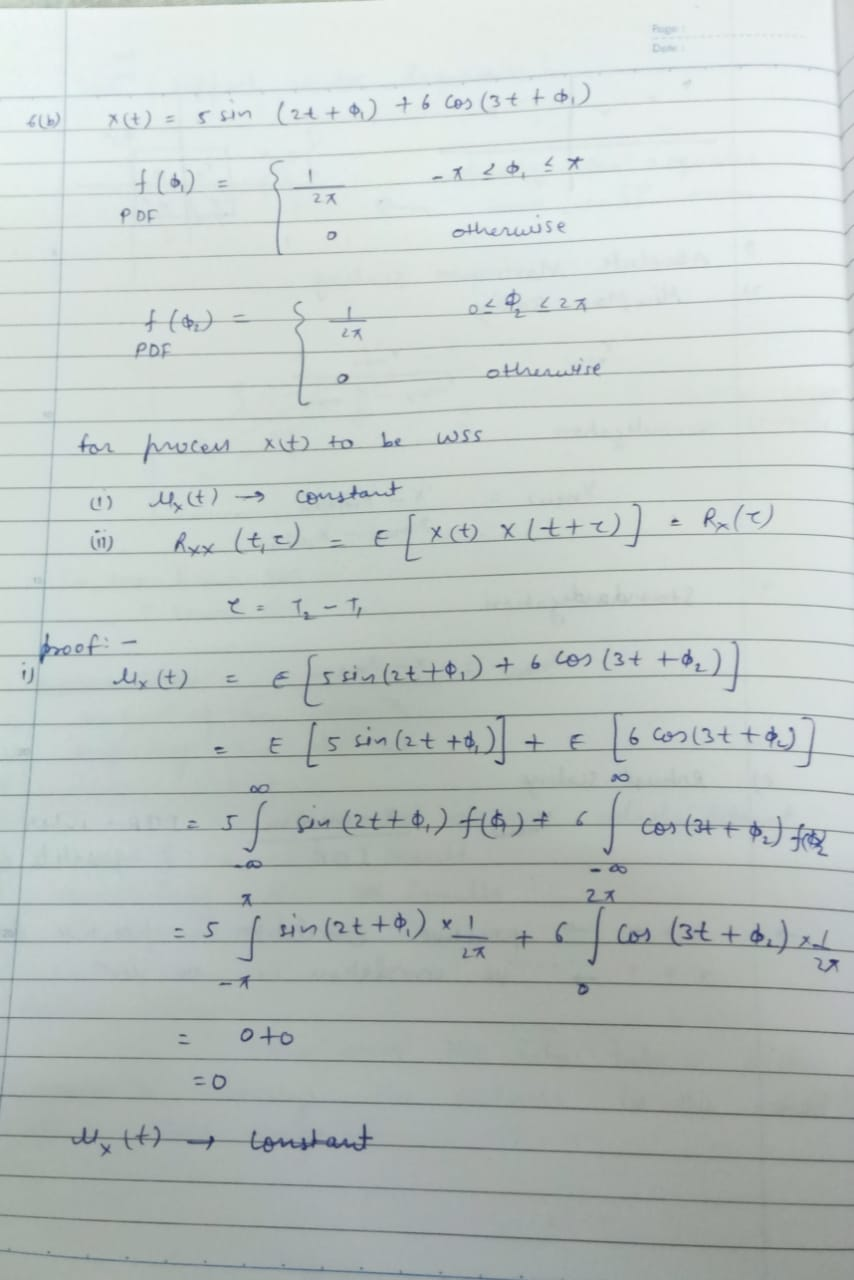

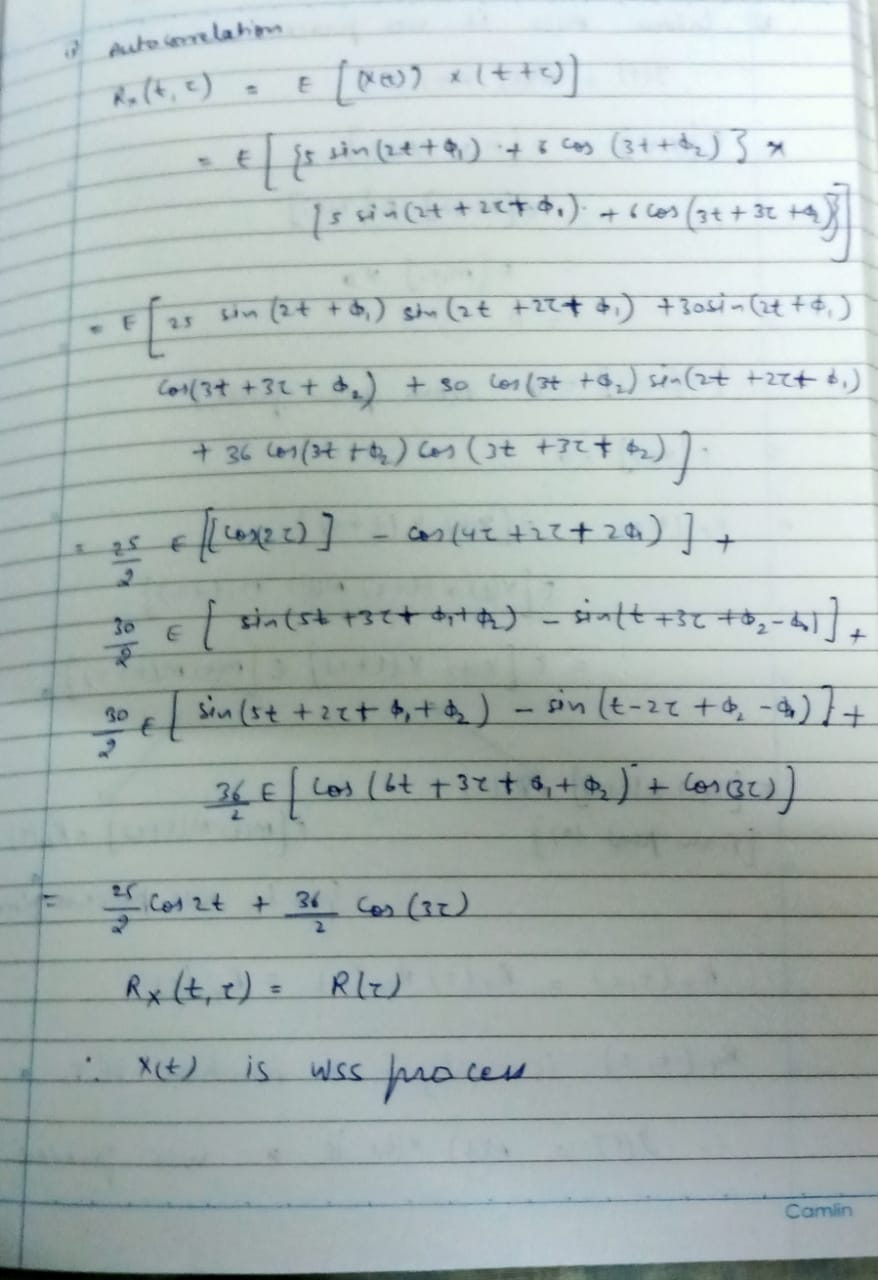

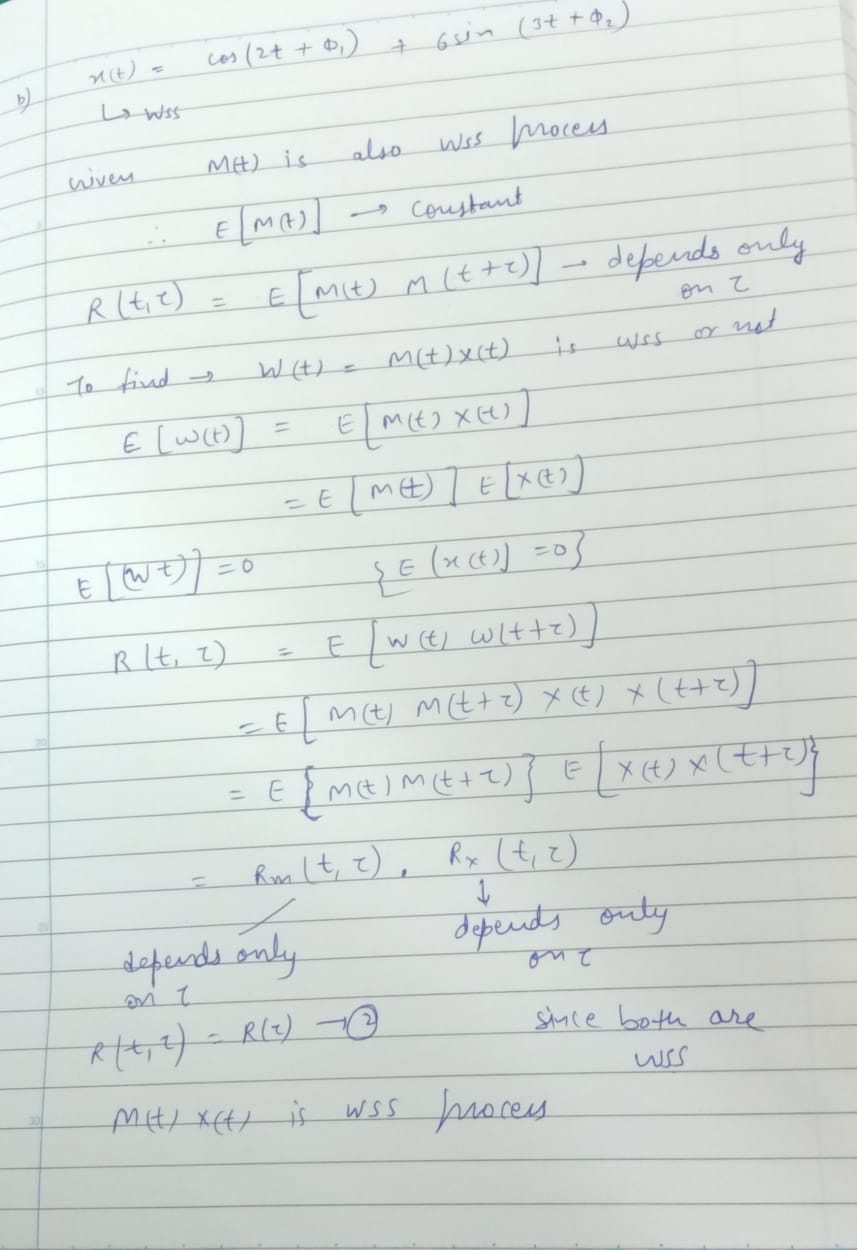

# Question 7

In [19]:
from numpy import random
x = random.chisquare(df=2, size=(2, 3))#df=2 and size=2,3
print(x)


[[2.86063812 2.10705334 0.55927972]
 [2.84244748 3.02863754 0.71708837]]


C:\Users\sakshi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sakshi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sakshi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

<AxesSubplot:ylabel='Density'>

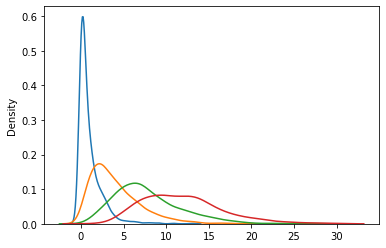

In [20]:

from numpy import random
import seaborn as sns

sns.distplot(random.chisquare(df=1, size=1000), hist=False)
sns.distplot(random.chisquare(df=4, size=1000), hist=False)
sns.distplot(random.chisquare(df=8, size=1000), hist=False)
sns.distplot(random.chisquare(df=12, size=1000), hist=False)



# Question 8

In [ ]:
import numpy as np

size = (2,3)

sample = np.random.exponential(2, size)
print(sample)

In [ ]:
import seaborn as sns

np.random.seed(10)  #fixing the seed for reproducibility


size = 1000  #plotting 1000 sample from 
#different exponential distribution
sns.kdeplot(np.random.exponential(1, size))
sns.kdeplot(np.random.exponential(2, size))
sns.kdeplot(np.random.exponential(3, size))

plt.legend([r"$\beta = 1$", 
            r"$\beta = 2$", 
            r"$\beta = 3$"])

plt.show()

# Question 9

In [21]:
from numpy import random
x = random.choice([2, 4, 6, 8], p=[0.1, 0.3, 0.6, 0.0], size=(100))
print(x)


[6 4 6 6 6 4 6 4 6 4 6 2 4 6 4 6 6 4 2 6 2 4 4 6 6 6 6 4 6 4 4 6 6 4 4 6 6
 4 6 6 6 6 4 6 4 4 6 6 6 6 6 6 4 4 6 4 4 4 6 6 6 4 6 6 4 2 6 6 4 4 6 4 2 6
 6 6 4 6 6 6 4 6 4 6 4 6 6 6 4 6 6 6 4 6 6 6 4 6 6 6]


In [22]:
from numpy import random
x = random.choice([2, 4, 6, 8], p=[0.1, 0.3, 0.6, 0.0], size=(3, 5))
print(x)


[[6 4 6 6 2]
 [6 6 6 6 4]
 [6 2 4 6 4]]


# Question 10(a)

C:\Users\sakshi\AppData\Local\Temp/ipykernel_8000/681032144.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  pdf = x**((k/2)-1)*math.exp(-x/2)/((2**(k/2))*(math.gamma(k/2)))


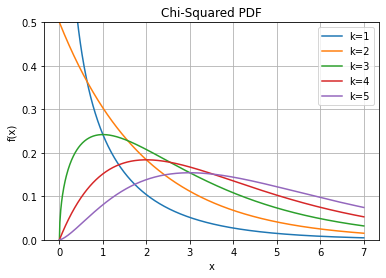

In [23]:
import math

def chiSquared_pdf(x,k):
    pdf = x**((k/2)-1)*math.exp(-x/2)/((2**(k/2))*(math.gamma(k/2)))
    return pdf

x = np.linspace(0,7,700)

K = [1,2,3,4,5]
for k in K:
    
    pdf = [chiSquared_pdf(i,k) for i in x]
    plt.plot(x,pdf,label=f"k={k}")
    plt.ylim(0,0.5)
    
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Chi-Squared PDF")
plt.grid()
plt.legend()


# Question 10(b)

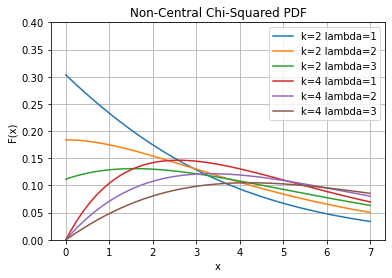

In [24]:
from scipy.special import iv

def nonCentralChi(x,l,k):
    pdf = 0.5 * np.exp(-0.5 * (x + l)) * np.power(x/l , (k/4 - 0.5)) * iv( 0.5*k-1 , np.sqrt(l*x) )
    return pdf
 
    
x = np.linspace(0,7,700)
K = [2,4]  
lam = [1,2,3]
for k in K:
    for l in lam:
        pdf = [nonCentralChi(i,l,k) for i in x]
        plt.plot(x,pdf,label=f"k={k} lambda={l}")
        plt.ylim(0,1)

plt.xlabel("x")
plt.ylabel("F(x)")
plt.ylim(0,0.4)
plt.title("Non-Central Chi-Squared PDF")
plt.grid()
plt.legend()
